<h1 align=center> Prédiction de loyer d'appartements </h1>

<h2 align=center> OpenClassrooms - CentraleSupélec Certificate</h2>

<h3 align=center>Jean Martial Tagro </h3>

### Sujet
Vous êtes consulté par une agence immobilière pour prédire les loyers des différents arrondissements de Paris, afin de les aider à prendre des décisions d'achat d'appartements.

### Objectif
Le but de ce travail est de trouver le meilleur model pour prédire le loyer d'un appartemant, connaissant sa surface et son arrondissement dans Paris. On considèrera dans un dans un premier temps l'evaluation dans le cas de la baseline (la régression linéaire avec une seule feature : la surface) puis nous améliorerons les performances en considérant des features bidimentionnels : la surface et l'arrondissement.

### 1. Une seule feature : la surface

##### 1.1 Récupération et filtrage du dataset

On se base sur l'étude faite au chapitre 10. Mais cette fois, on ne va pas décomposer l'algorithme de regression linéaire en cherchant le paramètre θ qui minimise la fonction de perte, mais utiliser directement cet algorithme avec sklearn. 

In [8]:
# importation des librairies necessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# importation des donnees labellisés : Surfaces, Loyers
house = pd.read_csv('house.csv')
#house.shape

In [10]:
# suppression des valeurs vides
house.dropna
house.shape

(545, 2)

Pas de valeurs vides.

In [11]:
#1er check des données
house[:10]

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
5,970,24
6,1560,41
7,1960,67
8,2000,63
9,2600,70


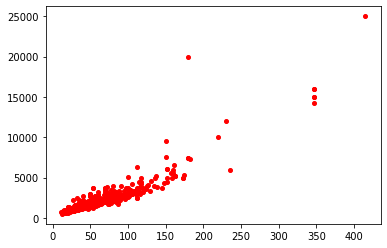

In [12]:
# 1er check du nuage des points (x,y) d'observation
plt.plot(house['surface'], house['loyer'], 'ro', markersize=4)

plt.show() # pour afficher que le graphique

Clairement, d'après la visualisation, on peut se dire que le montant du loyer dépend de manière linéaire de la surface du logement. On peut donc émettre une hypothèse de modélisation qui est que le phénomène possède la forme d'une droite. 

Aussi, on peut voir que lorsque la surface devient un peu trop grande, les données semblent devenir moins modélisables facilement, il y a plus de variabilité. On va considérer pour l'instant résoudre le problème de prédiction pour les loyers inférieurs à 10,000€, afin de conserver une robustesse du modèle à ces données plutôt anormales, qui correspondent peut-être à un autre modèle distinct ou à un traitement comme outliers.

In [13]:
# on ne garde que les observations dons le loyer est inférieur à 10000
house = house[house['loyer'] < 10000]
#house_data.head()

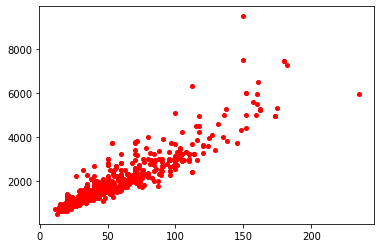

In [14]:
# On observe ...
plt.plot(house['surface'], house['loyer'], 'ro', markersize=4)

plt.show()

##### 1.2 Training set / Testing set

In [15]:
# Le modèle LinearRegression attend une feature à 2 dimensions, donc on met x sous deux dimensions avec reshape((-1,1))
house_surface = np.array(house['surface']).reshape((-1,1))

In [16]:
# on prend 80% des données pour l'entrainement
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(house_surface, house['loyer'], train_size=0.8)

##### 1.3 Creation du modèle et prédictions

In [17]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

# on fitte
model1.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
predict = model1.predict(x_test)
predict

array([2754.48728827, 1108.20114184, 1870.37065408, 2724.00050778,
       1382.58216625, 3699.57748345,  864.30689793,  864.30689793,
       1900.85743457,  894.79367842, 1474.04250772, 2845.94762974,
       1656.96319065, 3211.78899562, 2297.18558093, 1504.5292882 ,
       1108.20114184, 1047.22758086, 2388.6459224 , 1199.66148331,
       1169.17470282, 2388.6459224 , 1717.93675163, 2022.80455653,
       1413.06894674, 1748.42353212, 3181.30221513, 1291.12182478,
       2602.05338583,  894.79367842, 1352.09538576, 2358.15914191,
       1443.55572723, 3425.19645904, 1504.5292882 ,  986.25401988,
       3211.78899562, 1809.3970931 , 2419.13270289, 1992.31777604,
       5223.91650792, 3943.47172736, 2175.23845897, 2724.00050778,
       2114.26489799, 2114.26489799, 1504.5292882 , 1778.91031261,
       1260.63504429, 5193.42972743,  772.84655646, 2236.21201995,
       1809.3970931 , 2236.21201995, 2388.6459224 , 2724.00050778,
       3333.73611757,  894.79367842, 3333.73611757, 1931.34421

##### 1.4 Evaluation du modèle

In [19]:
print("le score est de : {}".format(model1.score(x_test, y_test)))
print("le taux d'erreur est de : {} %".format(100*(1-model1.score(x_test, y_test))))

le score est de : 0.8275148627018686
le taux d'erreur est de : 17.24851372981314 %


### 2. Deux features : la surface et l'arrondissement

Nous allons maintenant améliorer le score du modèle précédent en ajoutant une nouvelle feature : l'arrondissement de Paris dans lequel se trouve l'appartement de sorte qu'on a maintenant des inputs bi-directionnels.

In [98]:
# recuperation du dataset correspondant
data = pd.read_csv('house_data.csv')

In [104]:
# suppression des n.a (non available). ATTENTION A BIEN METTRE TOUT DROP NA DANS UNE NEW VAR.
house_na = data.dropna()

#house_na.head()

In [107]:
#On va se limiter aux appartement dont le loyer est inferieur à 10000 comme dans l'étude précédente
house_data = house_na[house_na['price'] < 10000]

# Check si number of inputs nul = 0
house_data.isna().sum()

price             0
surface           0
arrondissement    0
dtype: int64

Un check rapide du loyer en fonction uniquement de la surface donne :

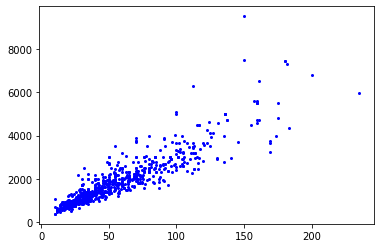

In [108]:
plt.plot(house_data['surface'], house_data['price'], 'bo', markersize=2)
plt.show()

In [109]:
#On va se limiter aux appartement dont le loyer est inferieur à 10000 comme dans l'étude précédente
house_data = house_data[house_data['price'] < 10000]
#house_data.columns

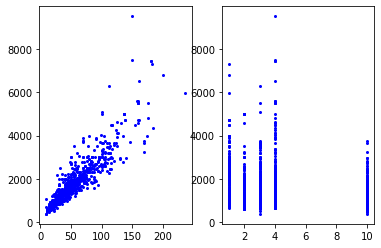

In [110]:
# On affiche sur un graphe pour voir l'evolution du loyer en fonction de la surface d'une part puis d'autre part en 
# fonction de l'arrondissement

fig,ax = plt.subplots(1,2)

for index, column in enumerate(house_data.columns[1:]): # car la 1ere colonne est le 'price'
    
    plt.subplot(1,2,index+1)
    plt.plot(house_data[column], house_data['price'], 'bo', markersize=2)

plt.show()

-

In [111]:
house_data[['surface','arrondissement']].head()

,surface,arrondissement
0,46.1,1.0
1,41.0,1.0
2,55.0,1.0
3,46.0,1.0
4,49.0,1.0


On a 818 inputs de deux dimensions. L'algorithme de K-NN convient bien ici. Nous étudier ses performances sur ce modèle après avoir trouvé l'hyper-paramètre K optimal (qui minimise le taux d'erreurs de prédiction). La prédiction consiste à donner le loyer, connaissant sa surface et son arrondissement dans Paris.

In [134]:
# Test/Training Split
x2_train, x2_test, y2_train, y2_test = train_test_split(house_data[['surface','arrondissement']], house_data['price'], train_size = 0.8)

In [135]:
# Test sur un 3-NN
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(3)
knn.fit(x2_train, y2_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

#### 2... Prediction et evaluation

In [136]:
predictions = knn.predict((x2_train))
predictions.shape

(650,)

In [140]:
y2_train.shape

(650,)

In [145]:
print("le score 3-NN est de : {}".format(knn.score(x2_test, y2_test)))
print("le taux d'erreur 3-NN est de : {} %".format(100*(1-knn.score(x2_test, y2_test))))

le score 3-NN est de : 0.7497682349362161
le taux d'erreur 3-NN est de : 25.023176506378388 %


Performance du 3-NN plus faible que celle de la Regression linéaire simple qui avait un score de 82,75%. Cherchons maintenant à optimiser k pour trouver le meilleur algorithme K-NN.

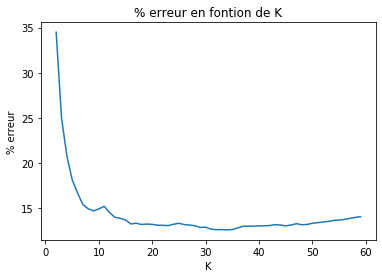

In [162]:
# Trouvons le meilleur k-NN pour cette problematique en testant differents K = [2-?]

errors = []

for k in range(2,60):
    knn = neighbors.KNeighborsRegressor(k)
    knn.fit(x2_train, y2_train)
    errors.append(100*(1-knn.score(x2_test, y2_test)))
    
# Representation
plt.xlabel('K')
plt.ylabel('% erreur')
plt.title('% erreur en fontion de K')
plt.plot(range(2,60), errors)
plt.show()
    

L'erreur semble etre minimale pour K ~ 35. 

In [163]:
knn35 = neighbors.KNeighborsRegressor(35)
knn35.fit(x2_train, y2_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                    weights='uniform')

In [164]:
print("le score 35-NN est de : {} % ".format(100*knn35.score(x2_test, y2_test)))
print("le taux d'erreur 35-NN est de : {} %".format(100*(1-knn35.score(x2_test, y2_test))))

le score 35-NN est de : 87.33487552237287 % 
le taux d'erreur 35-NN est de : 12.665124477627131 %


### BINGO ! 
#### Le score du 35-NN est d'environ 87,33 % > 82,75 % de la regression simple

Explorer une <a href='>autre piste d'amélioration :
"file:///Users/jean-martial/Downloads/Correction_Activite_regression_lineaire.html"